# ENGS93: Statistical Methods in Engineering 
## <span class="mark">HOMEWORK 8 <span class="mark">SOLUTIONS</span></span>

### Question 1: First load code from RX5 and create the necessary variables

In [19]:
maple <-read.delim("https://raw.githubusercontent.com/difuse-dartmouth/ENGS93/main/maple.txt", header = TRUE, sep = "\t", dec = ".")
summary(maple)
attach(maple)

VARMEAN=9*var(tapply(X=SAP, INDEX=FERT, FUN=mean))#VARMEAN = 405.4581
TEFFECTS=tapply(X=SAP, INDEX=FERT, FUN=mean)-mean(SAP)#Low=-6.7740741  Med=6.6481481  High=0.1259259
MEANVAR=mean(tapply(X=SAP, INDEX=FERT, FUN=var))#MEANVAR = 18.2938

      SAP            FERT              REGION         
 Min.   :74.20   Length:27          Length:27         
 1st Qu.:80.90   Class :character   Class :character  
 Median :87.00   Mode  :character   Mode  :character  
 Mean   :86.15                                        
 3rd Qu.:91.30                                        
 Max.   :98.20                                        

The following objects are masked from maple (pos = 3):

    FERT, REGION, SAP


The following objects are masked from maple (pos = 4):

    FERT, REGION, SAP


The following objects are masked from maple (pos = 5):

    FERT, REGION, SAP


The following objects are masked from maple (pos = 6):

    FERT, REGION, SAP




### Question 1 part a)

In [15]:
SSTR=sum(9*TEFFECTS^2) #=810.9163
#OR
SSTR=sum(9*(tapply(X=SAP, INDEX=FERT, FUN=mean))^2)-27*(mean(SAP))^2 #=810.9163

SSTR is 810.9163

### Question 1 part b)

In [16]:
SSE=sum(SAP^2)-sum(9*tapply(X=SAP, INDEX=FERT, FUN=mean)^2) #=439.0511
MSTR=SSTR/(3-1) #=405.4581
MSE=SSE/(27-3) #=18.2938

F=MSTR/MSE 
p=1-pf(F,(3-1),(27-3)) #p=3.526929e-06

#output 
p

[1] 3.526929e-06

We find that MSTR=VARMEAN and MSE=MEANVAR. So, when you compare MSTR and MSE, you are really comparing the weighted variance of treatment means and the mean of treatment variances.

p=3.526929e-06, so we reject, at 1% level, the null hypothesis that the treatment means are all equal (in other words, the null hypothesis that the fertilizer level has no association with sap production).

### Question 1 part c)

In [17]:
maple.lm=lm(SAP~FERT) 
anova(maple.lm)
#OR
maple.aov1=aov(SAP~FERT) 
summary(maple.aov1)
#OR
anova(maple.aov1)


model.tables(maple.aov1) #Low=-6.774 Med=6.648 High=0.126

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FERT,2,810.9163,405.4581,22.1637,3.526929e-06
Residuals,24,439.0511,18.2938,NA,NA


            Df Sum Sq Mean Sq F value   Pr(>F)    
FERT         2  810.9   405.5   22.16 3.53e-06 ***
Residuals   24  439.1    18.3                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
FERT,2,810.9163,405.4581,22.1637,3.526929e-06
Residuals,24,439.0511,18.2938,NA,NA


Tables of effects

 FERT 
FERT
  High    Low    Med 
 0.126 -6.774  6.648 

In any of these cases, we get the full one-way ANOVA table that describes the effects of factor FERT on SAP. We get the degrees of freedom for MSTR and MSE equal to 2 and 24 respectively. We also get the SSTR(=810.92), SSE(=439.05), MSTR(=405.46), MSE(=18.29), F(=22.164) and p(=3.527e-06) values exactly as we got earlier.

Using `model.tables(maple.a0v1)` we got the same estimates of the treatment effects as obtained in question 3 of R exercise 5.

### Question 1 part d)

hat values (leverages) are all = 0.1111111
 and there are no factor predictors; no plot no. 5



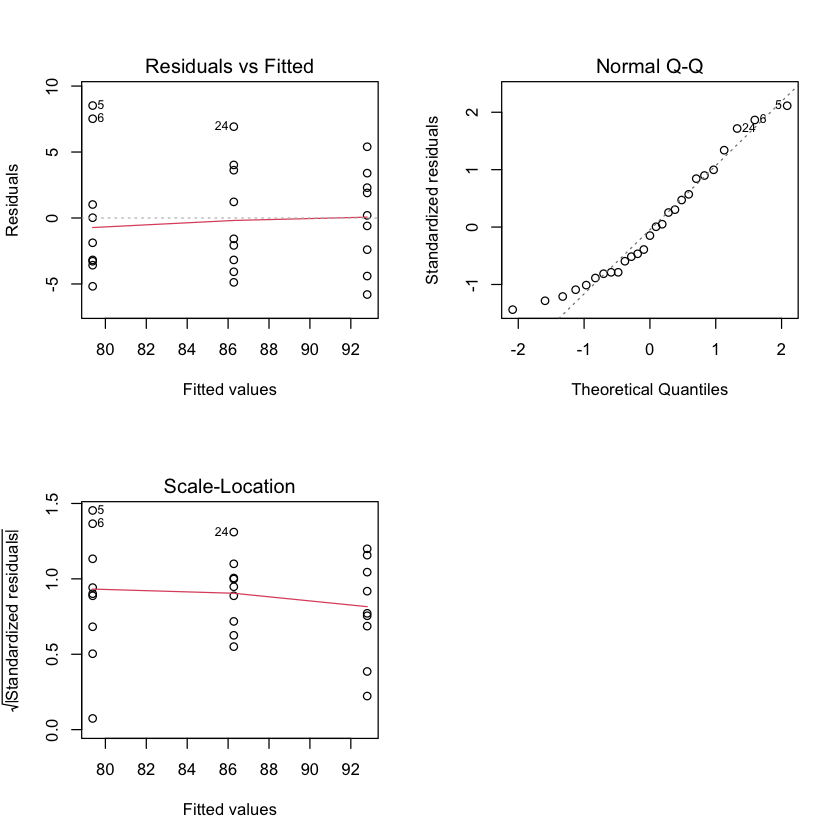

In [18]:
par(mfrow=c(2,2)) 
plot(maple.aov1)

The two main assumptions of one-way ANOVA are that 1. the treatment populations must be normal and 2. the treatment populations must all have the same variance. Looking at the top left plot, you see that the residual variances are approximately equal. Also, looking at the top right plot, you see that the residuals look normally distributed. So we can conclude that the assumptions of ANOVA seem to be satisfied.